In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
# 한글 폰트 사용을 위한 설정
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:/Windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [164]:
df = pd.read_csv('./data/ecommerce_sales_data.csv')

display(df.head(5))

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09


In [165]:
null = df.isnull().sum()
#print(null)
df['DiscountRate'] = df['DiscountRate'].fillna(df['DiscountRate'].mean())
#print(df['DiscountRate'].isnull().sum())

In [166]:
print(df.info())
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
print(df['OrderDate'].dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       120 non-null    int64  
 1   Product       120 non-null    object 
 2   Category      120 non-null    object 
 3   Quantity      120 non-null    int64  
 4   Price         120 non-null    int64  
 5   CustomerID    120 non-null    int64  
 6   Birthdate     120 non-null    object 
 7   OrderDate     120 non-null    object 
 8   Country       120 non-null    object 
 9   DiscountRate  120 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 9.5+ KB
None
datetime64[ns]


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [167]:
df['TotalRevenue'] = df['Quantity'] * df['Price']
df

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate,TotalRevenue
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18:00,미국,0.14,185000
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45:00,독일,0.29,100000
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19:00,중국,0.23,32000
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 02:19:00,일본,0.20,8000
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34:00,대한민국,0.09,78000
...,...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57:00,독일,0.20,33000
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37:00,대한민국,0.09,164000
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27:00,독일,0.09,33000
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 09:01:00,독일,0.06,86000


C:\Users\user\AppData\Local\Temp\ipykernel_420\3407096325.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month = df.resample('M')['TotalRevenue'].sum()


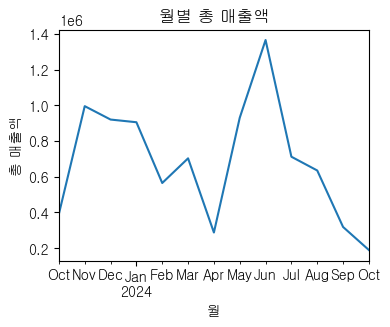

In [168]:
df.set_index('OrderDate', inplace=True)
month = df.resample('M')['TotalRevenue'].sum()

month.plot(figsize=(4, 3))
plt.title('월별 총 매출액')
plt.xlabel('월')
plt.ylabel('총 매출액')
plt.show()

In [169]:
category = df.groupby('Category')['TotalRevenue'].sum()
top = category.sort_values(ascending=False).head(3)
print(top)

Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64


In [170]:
country = df.groupby('Country')['TotalRevenue'].sum()
top = country.sort_values(ascending=False).head(5)
print(top)

Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64


3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [171]:
customer = df.groupby('CustomerID')['TotalRevenue'].sum()
top = customer.sort_values(ascending=False).head(5)
print(top)

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64


In [172]:
customer = df.groupby('CustomerID').size()
top = customer.sort_values(ascending=False).head(5)
print(top)

CustomerID
1007    2
1038    2
1141    2
1278    2
1421    2
dtype: int64


In [173]:
# 연령대
# 2026 - Birthdate의 year -> 나이
# 나이 -> 20, 30, 40, 50대로 연령대 구분
df['Age'] = 2026 - pd.to_datetime(df['Birthdate']).dt.year
df['AgeGroup'] = (df['Age'] // 10) * 10
top = df.groupby('AgeGroup')['Category'].agg(lambda x: x.mode()[0])
print(top)

AgeGroup
20         Beauty
30           Food
40          Books
50    Electronics
60    Electronics
Name: Category, dtype: object


4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [174]:
product = df.groupby('Product')['Quantity'].sum()
top = product.sort_values(ascending=False).head(5)
print(top)

Product
셔츠     25
립스틱    22
소설     21
커피     20
역사책    20
Name: Quantity, dtype: int64


In [175]:
category = df.groupby(['Category', 'Product'])['Quantity'].sum()
top = category.groupby('Category').idxmax()
print(top)

Category
Beauty              (Beauty, 립스틱)
Books                 (Books, 소설)
Clothing           (Clothing, 셔츠)
Electronics    (Electronics, 노트북)
Food                   (Food, 커피)
Sports             (Sports, 요가매트)
Name: Quantity, dtype: object


In [176]:
average = df.groupby('Product')['Quantity'].mean()
top = average.sort_values(ascending=False).head(3)
print(top)

Product
주스      5.0
자기계발    5.0
요가매트    4.0
Name: Quantity, dtype: float64


5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

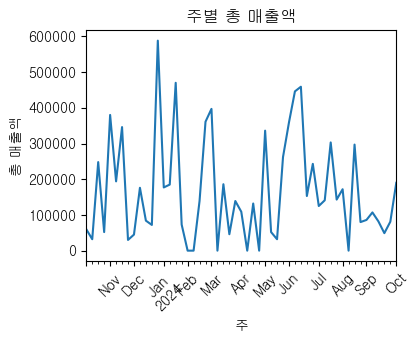

In [177]:
week = df.resample('W')['TotalRevenue'].sum()
week.plot(figsize=(4, 3))
plt.title('주별 총 매출액')
plt.xlabel('주')
plt.ylabel('총 매출액')
plt.xticks(rotation=45)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_420\720788303.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month = date.resample('M')['TotalRevenue'].sum()


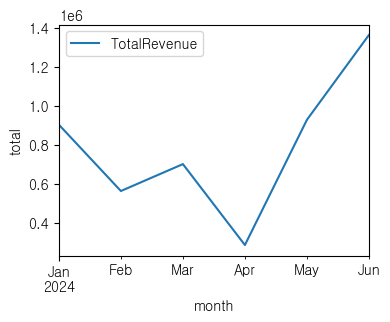

In [182]:
start_date = '2024-01-01'
end_date = '2024-06-30'
date = df[(df.index >= start_date) & (df.index <= end_date)]
month = date.resample('M')['TotalRevenue'].sum()

month.plot(figsize=(4, 3))
plt.xlabel('month')
plt.ylabel('total')
plt.legend()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_420\295278837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us['OrderHour'] = us.index.hour


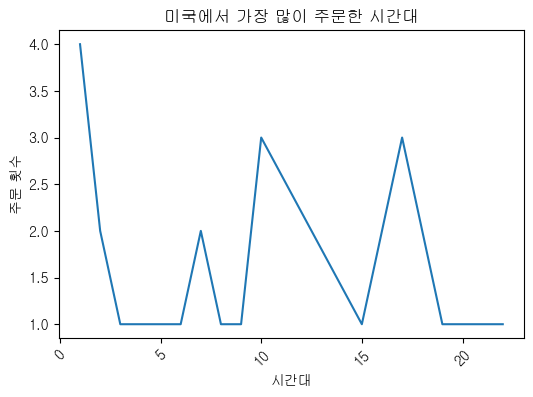

In [183]:
us = df[df['Country'] == '미국']
us['OrderHour'] = us.index.hour
time = us.groupby('OrderHour').size()

time.plot(figsize=(6, 4))
plt.title('미국에서 가장 많이 주문한 시간대')
plt.xlabel('시간대')
plt.ylabel('주문 횟수')
plt.xticks(rotation=45)
plt.show()

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [180]:
customer = df.groupby('CustomerID').size()
repeat = (customer > 1).mean()
print(repeat)

0.08108108108108109


In [181]:
# 할인된 가격 계산
df['DiscountedPrice'] = df['Price'] * (1 - df['DiscountRate'])

category = df.groupby('Category')['DiscountedPrice'].sum()

top_category = category.idxmax()
top_discount = category.max()

print(top_category)
print(top_discount)

Food
537358.5714285715
